# Sensing & Measurements LAB Project
*Course Instructor: Dr Mehran Jahed*

**Seyyed Amirmahdi Sadrzadeh | 401102015**

**Aisa-Sadat Takyar | 401101462**

**Mohammadkazem Shahrabi | 401101987**


## Importing the needed libraries

In this section, the necessary Python libraries are imported to facilitate data processing, signal analysis, and machine learning tasks. These libraries provide a range of functionalities that are essential for the project. Here's a detailed explanation of the libraries:



*   **pandas:** A powerful data manipulation and analysis library. It is used for handling structured data in the form of DataFrames.
*   **numpy:** Used for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices.
*   **scipy.signal:** This module contains tools for signal processing, including functions for filtering data, detecting peaks, and handling other signal processing tasks. Specifically, butter and filtfilt are used for filter design and application, while iirnotch helps in designing notch filters to remove specific frequencies.
*   **sklearn.preprocessing.StandardScaler:** Standardizes features by removing the mean and scaling to unit variance, which is a common preprocessing step for many machine learning models.
*   **sklearn.model_selection.train_test_split:** Used to split the dataset into training and testing sets, which is crucial for evaluating the performance of machine learning models.
*   **sklearn.svm.SVC:** Implements Support Vector Machine (SVM) classification, which is a powerful supervised learning model used for classification tasks.
*   **sklearn.ensemble.RandomForestClassifier:** A random forest classifier is an ensemble learning method used for classification tasks that builds multiple decision trees.
*   **sklearn.metrics:** This module provides functions for evaluating the performance of machine learning models. Specifically, confusion_matrix, accuracy_score, and f1_score are used to evaluate the model's prediction accuracy, precision, and overall performance.
*   **seaborn and matplotlib.pyplot:** Visualization libraries used to create plots and graphs to display data and results.
scipy.io: Allows reading and writing MATLAB .mat files, which are often used for scientific data storage.
*   **scipy.signal.find_peaks:** This function is used for peak detection in signal data, which is important for identifying key features in time series data.
*   **os:** Interacts with the operating system to handle file paths, directory operations, and system-related tasks.
*   **collections.Counter:** Used for counting occurrences of objects, such as the frequency of different classes in a dataset.
*   **sklearn.neighbors.KNeighborsClassifier:** Implements the k-nearest neighbors algorithm, another machine learning model for classification tasks based on similarity between data points.

In [106]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt, iirnotch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from scipy.signal import find_peaks
import os
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier

## Preprocessing the data

Loading the dataset:

In [20]:
data = scipy.io.loadmat('S4_E1_A1.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Jan 14 02:34:58 2013',
 '__version__': '1.0',
 '__globals__': [],
 'emg': array([[-1.3400403e-05,  3.6342794e-06,  1.3427939e-06, ...,
         -6.5195110e-08,  9.2779173e-06,  4.1460644e-05],
        [-3.3206205e-05,  4.1374578e-06, -1.1749447e-06, ...,
          6.0620187e-07,  9.4464485e-06,  2.6858001e-05],
        [-3.0855903e-05,  5.6477320e-06, -2.1820401e-06, ...,
          2.1168451e-06,  1.1125624e-05,  3.5271964e-06],
        ...,
        [-1.1329218e-05,  1.5268186e-05,  2.0740879e-06, ...,
         -1.4547473e-07, -8.2756674e-07,  8.3502009e-06],
        [-2.4336703e-06,  1.2750030e-05,  3.7525804e-06, ...,
          2.3724363e-06, -8.2782725e-07,  5.1606826e-06],
        [ 7.9725205e-06,  1.3924560e-05,  5.0953740e-06, ...,
          3.5841759e-07, -2.8422778e-06,  2.4747110e-06]], dtype=float32),
 'acc': array([[ 0.01558193,  0.8246911 ,  0.4796109 , ...,  0.46155977,
          0.13183303,  0.713534

Dataset titles:

In [21]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])

**Dataset variables**

For each exercise, for each subject, the database contains one matlab file with synchronized variables. The variables included in the matlab files are:
- **Subject:** subject number.
- **Exercise:** exercise number.
- **Emg (12 columns):** sEMG signal. Columns 1-8 are the electrodes equally spaced around the forearm at the height of the radio humeral joint. Columns 9 and 10 contain signals from the main activity spot of the muscles flexor and extensor digitorum superficialis, while columns 11 and 12 contain signals from the main activity spot of the muscles biceps brachii and triceps brachii.
- **Acc (36 columns):** three-axes accelerometers of the 12 electrodes.
- **Glove (22 columns):** uncalibrated signal from the 22 sensors of the cyberglove.
The cyberglove signal corresponds to raw data from the cyberglove sensors, which are expected to be proportional to the angles at the joints.
- **Stimulus (1 column):** the movement repeated by the subject, according to the displayed movie.
- **Restimulus (1 column):** again the movement repeated by the subject, but with the duration of the movement label refined a-posteriori in order to better correspond to the real movement.
Read the paper Gijsberts et al., 2014 for more details about relabelling procedure.
- **Repetition (1 column):** repetition of the stimulus.
- **Rerepetition (1 column):** repetition of restimulus.
- **Force (6 columns):** force recorded during the third exercise
- **forcecal (2 x 6 values):** the force sensors calibration values, corresponding to the minimal and the maximal force.

Seeing the first 2000 values in the stimulus:

In [120]:
data['stimulus'][0:7009]

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int8)

You can see that the movement has changed at the index 7009, this means that we can take this as the time between each movement (or sample).

`set(data['stimulus'].reshape(-1))` is used to find the unique values in the stimulus array. The `reshape(-1)` function flattens the array, and `set()` is used to remove duplicates, allowing the identification of the unique stimuli values.

In [51]:
set(data['stimulus'].reshape(-1))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

Turning the data into a numpy array form

In [52]:
emg_data = np.array(data['emg']).transpose()
stimulus = data['stimulus']

In this step, a specific portion of the EMG data is being visualized for one electrode:

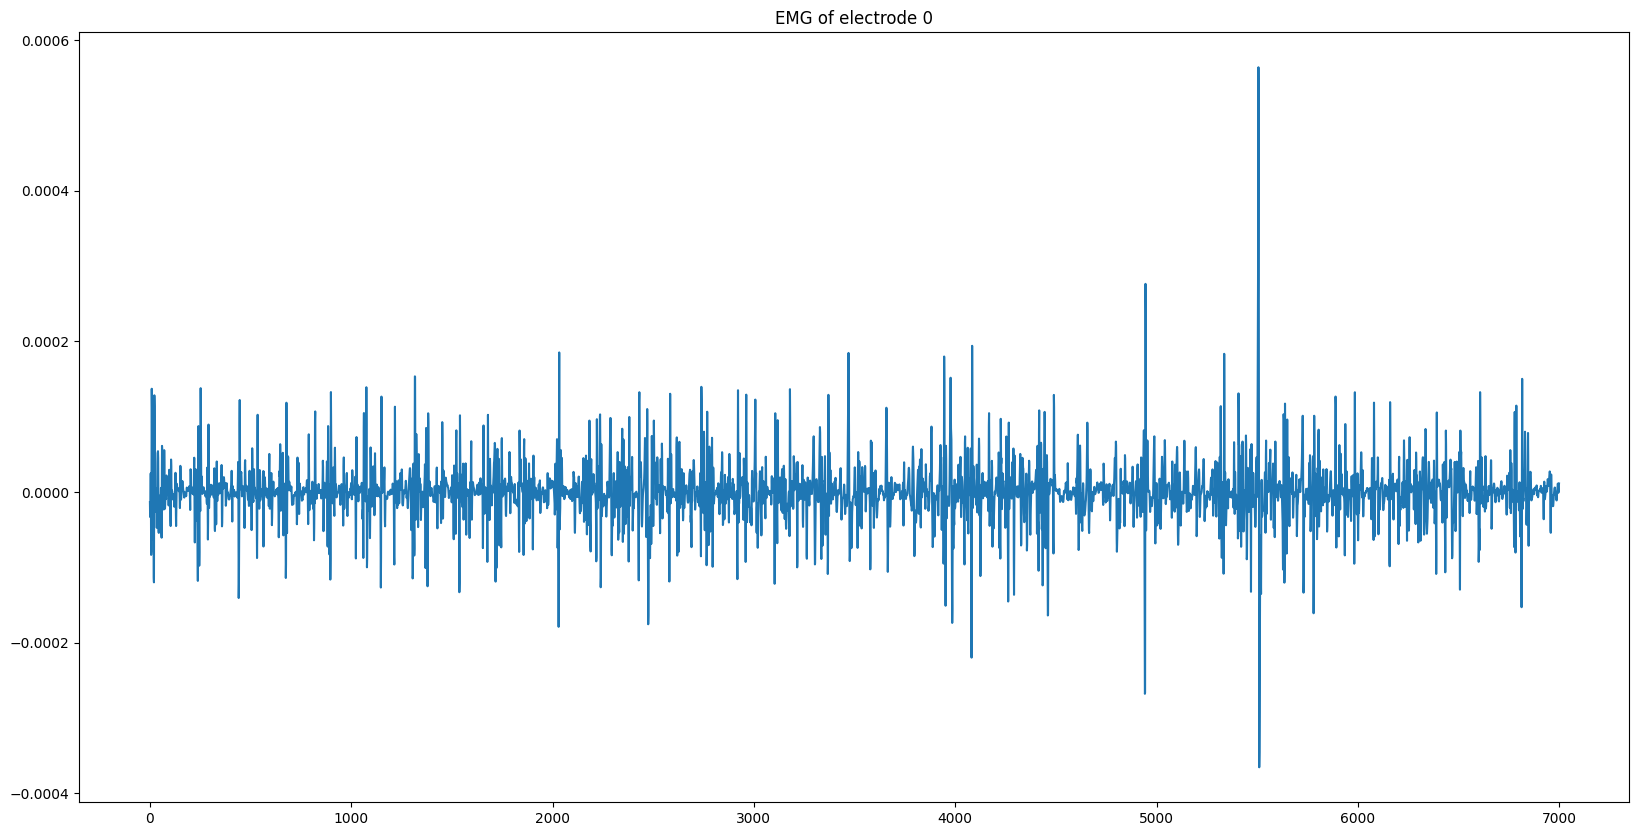

In [84]:
idx = 0
fs = 7000

plt.figure(figsize=(20,10))
plt.plot(emg_data[idx, 0:fs])
plt.title(f"EMG of electrode {idx}")
plt.savefig(f'EMG_elec{idx}.png')
plt.show()

This code plots the magnitude spectrum of the EMG signal for a specific electrode, which is a frequency-domain representation of the signal. It allows you to analyze the frequency components (i.e., how much of the signal's energy is present at each frequency) to identify the dominant frequencies in the EMG data. The Fast Fourier Transform (FFT) is typically used to transform a time-domain signal into the frequency domain.

*   `plt.magnitude_spectrum`: This function computes and plots the magnitude of the signal's frequency components, showing how the energy of the signal is distributed across different frequencies.
*   The plot helps identify significant frequency components and is useful for filtering or feature extraction tasks, especially in signal processing.
*   `fs` (sampling frequency) is used to correctly map the frequencies in the plot to the actual values.

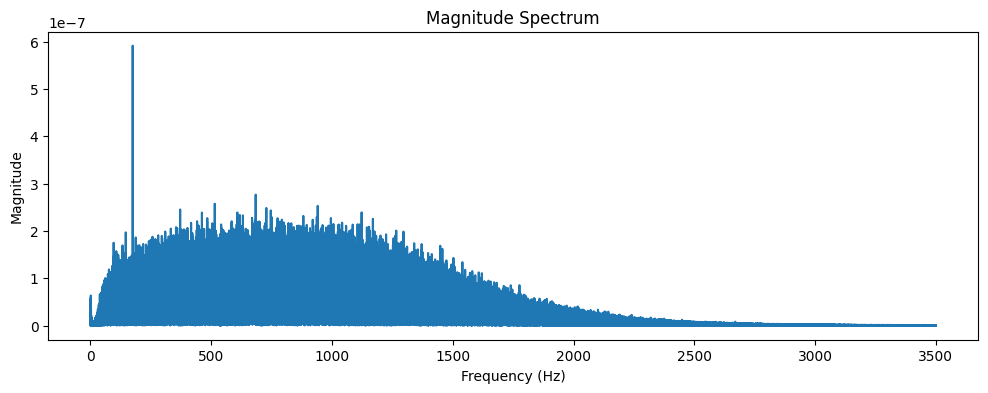

In [86]:
plt.figure(figsize=(12, 4))
plt.magnitude_spectrum(emg_data[idx, :], Fs=fs)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.savefig(f'FFT_elec{idx}.png')
plt.show()

## Signal Processing

The following steps must be done:
- Bandpass Filtering
- Notch filter
- Z-score

### Bandpass filtering
We will utilize a bandpass filter regarding the frequency range of EMG signals.

In [87]:
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

Applying the bandpass filter to the data:

In [88]:
fs = 7000
f_low = 20
f_high = 200

emg_signal_bandpass = []
for i in range(emg_data.shape[0]):
    emg_signal_bandpass.append(butter_bandpass_filter(emg_data[i, :], f_low, f_high, fs))
emg_signal_bandpass = np.array(emg_signal_bandpass)

Plotting the result:

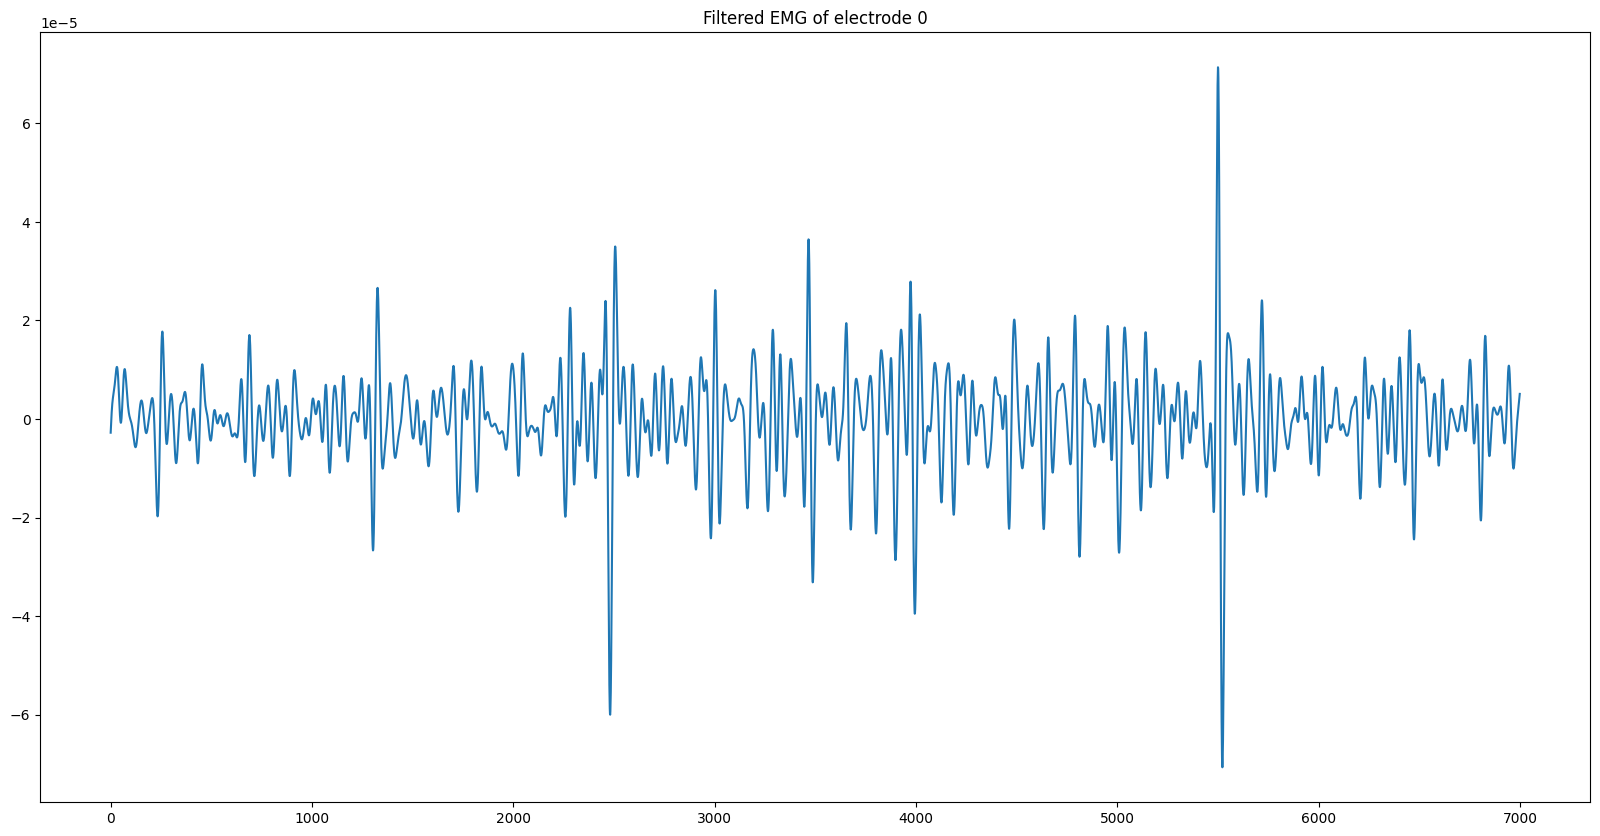

In [89]:
plt.figure(figsize=(20,10))
plt.plot(emg_signal_bandpass[idx, 0:fs])
plt.title(f"Filtered EMG of electrode {idx}")
plt.savefig(f'EMG_filtered_elec{idx}.png')
plt.show()

Plotting the spectrum of the filtered signal:

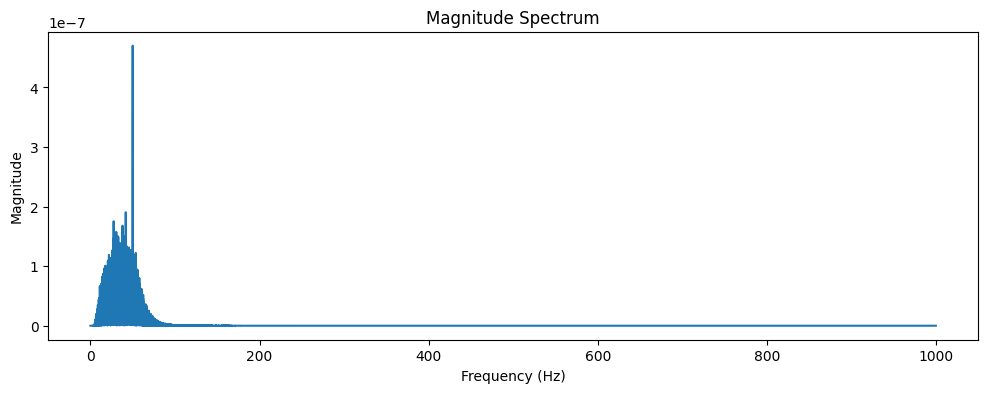

In [91]:
# plot the magnitude spectrum
plt.figure(figsize=(12, 4))
plt.magnitude_spectrum(emg_signal_bandpass[idx, :], Fs=2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.savefig(f'EMG_filtered_fft_elec{idx}.png')
plt.show()

### Notch filter
Creating the `50 Hz` notch filter function:

In [92]:
def notch_filter(data, notch_freq, fs, Q=30):
    nyq = 0.5 * fs
    f0 = notch_freq / nyq
    b, a = iirnotch(f0, Q)
    y = filtfilt(b, a, data)
    return y

Applying the filter to the data:

In [93]:
notch_freq = 50
emg_signal_notch = notch_filter(emg_signal_bandpass, notch_freq, fs)

Plotting the magnitude results:

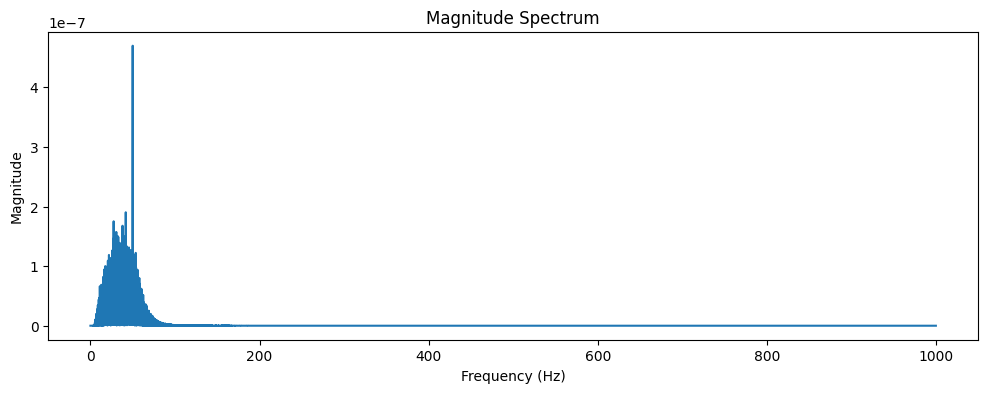

In [95]:
# plot the magnitude spectrum
plt.figure(figsize=(12, 4))
plt.magnitude_spectrum(emg_signal_notch[0], Fs=2000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.savefig(f'EMG_notch_fft_elec{idx}.png')
plt.show()

And plotting the results:

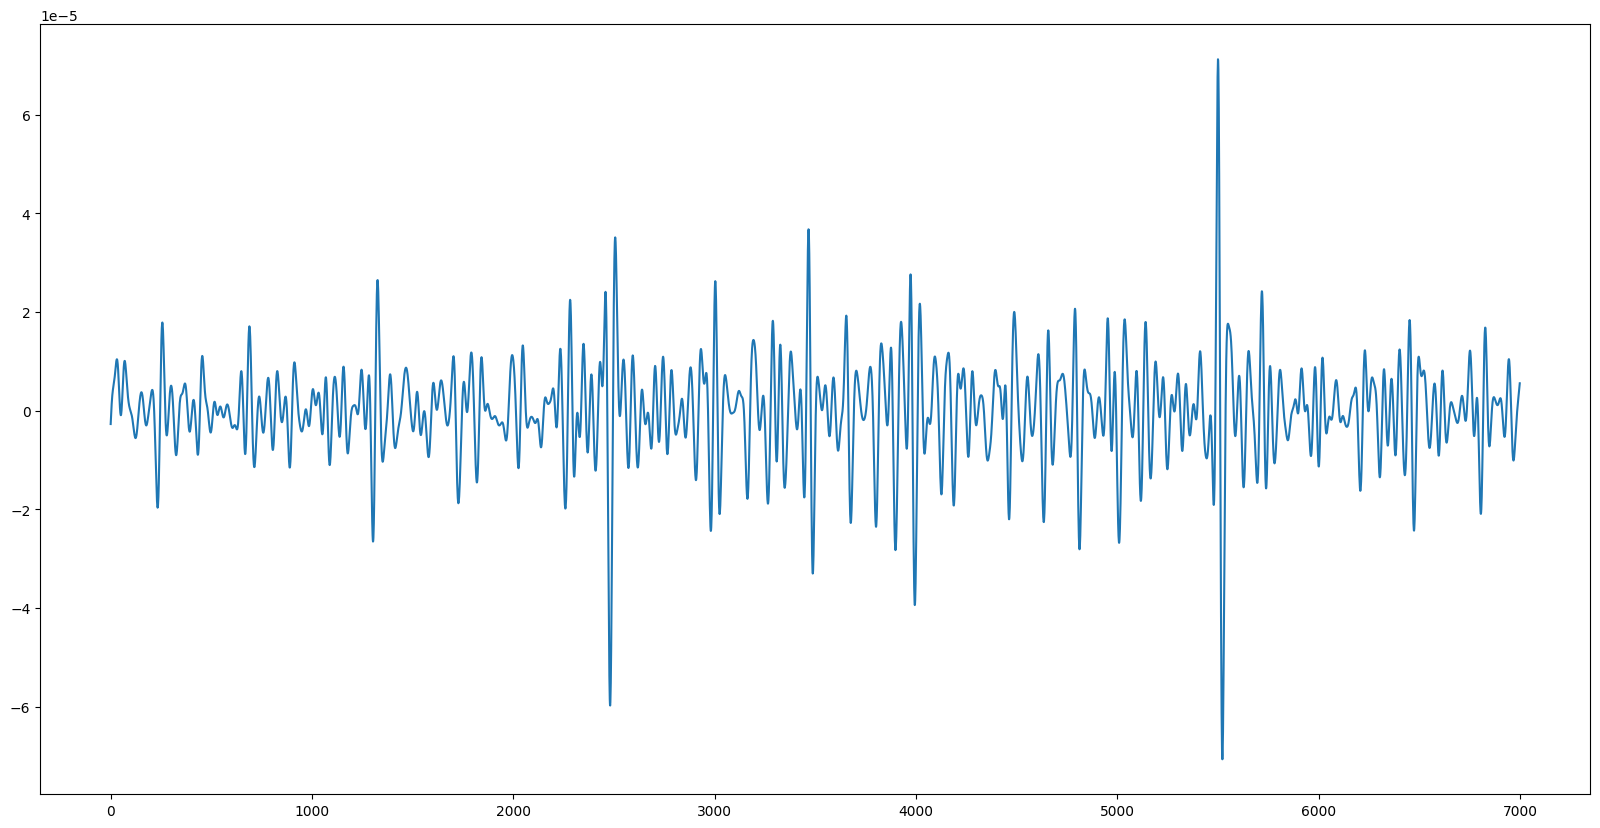

In [97]:
plt.figure(figsize=(20,10))
plt.plot(emg_signal_notch[0][0:fs])
plt.savefig(f'EMG_notch_elec{idx}.png')
plt.show()

### Z-score normalization


1.   Z-score Normalization:

*   The StandardScaler from sklearn.preprocessing is used to normalize the EMG signal by applying Z-score normalization. This process standardizes the data by subtracting the mean and dividing by the standard deviation for each signal. This ensures that the data has a mean of 0 and a standard deviation of 1, which helps improve the performance of many machine learning models.
*   The normalized signal is stored in emg_signal_normalized.

2.   Windowing the Signal:


*   The `window_signal` function splits the normalized EMG signal into smaller windows for further analysis or feature extraction. Each window represents a small portion of the signal, and this is common in time-series analysis where the signal is divided into overlapping or non-overlapping segments.
*   `window_length` is set to 0.2 seconds (calculated by `round(0.2 * fs)`), and `window_step` is set to 0.01 seconds (calculated by `round(0.01 * fs)`), which determine the size of the window and the step size for sliding across the signal, respectively.
*   The function also assigns a label for each window based on the most common value of the stimulus signal within that window. This could be used for classification, where each window corresponds to a specific movement or task.

3.    Preparing the Signal for Analysis:

*   After processing, the `window_signal` function returns two arrays:
**   `signal_windows`: The windows of the signal, stacked along the third dimension.
**   `window_labels`: The corresponding labels for each window, which a|re likely used for training or evaluation in a machine learning model.

In [98]:
scaler = StandardScaler()
emg_signal_normalized = scaler.fit_transform(emg_signal_notch)

data_prep = emg_signal_normalized

In [100]:
def window_signal(emg_signal, window_length, window_step, stimulus):
    windows = []
    labels = []
    num_samples = emg_signal.shape[1]

    for start in range(0, num_samples - window_length + 1, window_step):
        end = start + window_length

        # Extract window of the signal
        windowed_signal = emg_signal[:, start:end]  # Extract along the first dimension
        label = Counter(stimulus[start:end].reshape(-1)).most_common(1)[0][0]

        windows.append(windowed_signal)
        labels.append(label)

    windows = np.stack(windows, axis=2)  # Stack the windows along the third dimension

    return windows, labels

window_length = round(0.2 * fs)
window_step = round(0.01 * fs)
signal_windows, window_labels = window_signal(data_prep, window_length, window_step, stimulus)

In [101]:
signal_windows.shape

(12, 1400, 25661)

### Feature Extraction

Recommended features:
- Mean absolute value (MAV)
- Standard deviation (STD)
- Variance (VAR)
- Waveform length (WL)
- Zero crossing (ZC)
- Root mean square (RMS)
- Number of peaks (NP)
- Slope sign change (SSC)
- Correlation coefficient (Cor)
- Integrated absolute value (IAV)

Defining each feature:

In [102]:
def mean_absolute_value(signal):
    return np.mean(np.abs(signal))

def standard_deviation(signal):
    return np.std(signal)

def variance(signal):
    return np.var(signal)

def waveform_length(signal):
    return np.sum(np.abs(np.diff(signal)))

def zero_crossing(signal):
    return np.sum(np.diff(np.sign(signal)) != 0)

def root_mean_square(signal):
    return np.sqrt(np.mean(np.square(signal)))

def number_of_peaks(signal):
    peaks, _ = find_peaks(signal)
    return len(peaks)

def slope_sign_change(signal):
    return np.sum(np.diff(np.sign(np.diff(signal))) != 0)

def correlation_coefficient(signal1, signal2):
    return np.corrcoef(signal1, signal2)[0, 1]

def integrated_absolute_value(signal):
    return np.sum(np.abs(signal))

Applying these features to the dataset:

In [103]:
def calculate_features_for_windows(signal_windows):
    num_windows = signal_windows.shape[2]
    num_features = 10  # Assuming 10 features are calculated
    num_channels = signal_windows.shape[0]

    features = np.zeros((num_windows, num_features, num_channels))

    for i in range(num_windows):
        for j in range(num_channels):
            window = signal_windows[j, :, i]

            mav = mean_absolute_value(window)
            std = standard_deviation(window)
            var = variance(window)
            wl = waveform_length(window)
            zc = zero_crossing(window)
            rms = root_mean_square(window)
            npk = number_of_peaks(window)
            ssc = slope_sign_change(window)
            cor = correlation_coefficient(window, window)
            iav = integrated_absolute_value(window)

            features[i, :, j] = [mav, std, var, wl, zc, rms, npk, ssc, cor, iav]

    # Reshape features array to match desired column shape
    features_reshaped = features.reshape(num_windows, -1)

    # Create a DataFrame from the reshaped features array
    feature_names = ['MAV', 'STD', 'VAR', 'WL', 'ZC', 'RMS', 'NP', 'SSC', 'Cor', 'IAV']
    columns = [f'Channel{j+1}_{col}' for j in range(num_channels) for col in feature_names]
    features_df = pd.DataFrame(features_reshaped, columns=columns)

    return features_df

The `window_labels` (previously generated) are added as labels for the features, resulting in a combined DataFrame (`data_df`) containing both the features and their corresponding labels.

In [104]:
features = calculate_features_for_windows(signal_windows)

A histogram of the labels (`window_labels`) is plotted to show the distribution of the different classes or movements.

array([[<Axes: title={'center': 'label'}>]], dtype=object)

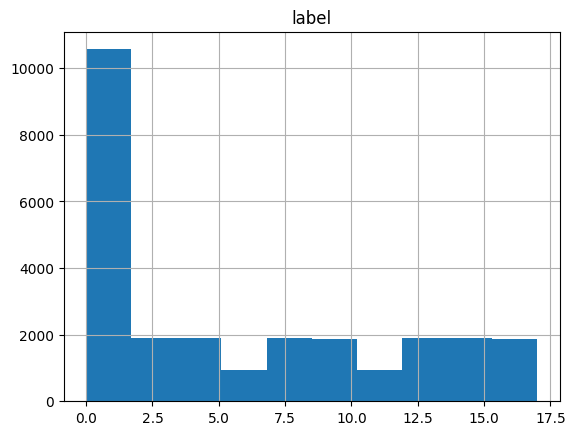

In [107]:
STIM_df = pd.DataFrame(window_labels, columns=['label'])
data_df = pd.concat([features, STIM_df], axis=1)
STIM_df.hist()

It can be seen that the rest stimulus (label = 0) has imbalanced our data set. Regarding the fact that we don't want to classify the rest stimulus, we will remove it from dataset.

In [108]:
no_rest_data_df = data_df[data_df['label'] != 0]
no_rest_data_df

,Channel1_MAV,Channel1_STD,Channel1_VAR,Channel1_WL,Channel1_ZC,Channel1_RMS,Channel1_NP,Channel1_SSC,Channel1_Cor,Channel1_IAV,...,Channel12_STD,Channel12_VAR,Channel12_WL,Channel12_ZC,Channel12_RMS,Channel12_NP,Channel12_SSC,Channel12_Cor,Channel12_IAV,label
91,0.881595,0.714754,0.810795,0.830136,0.325424,0.349511,0.764182,0.719985,1.506974,0.775394,...,1162.190342,455.594225,489.315290,1069.854297,1007.978737,2109.763286,1085.552213,1192.776299,1114.069518,1
92,0.915944,0.691711,0.783413,0.852870,0.335287,0.359076,0.794195,0.700216,1.476329,0.776712,...,1194.018309,469.402407,502.706472,1111.872733,980.302060,2066.861122,1087.397016,1166.079313,1104.658077,1
93,0.878981,0.700713,0.780169,0.858146,0.332369,0.360242,0.811229,0.692717,1.472456,0.732194,...,1201.404473,465.315910,504.338985,1135.721292,969.804382,2061.438293,1025.072063,1214.048605,1111.067451,1
94,0.900667,0.705366,0.762943,0.861843,0.315669,0.372664,0.809276,0.698936,1.426687,0.716800,...,1206.580186,441.936497,521.729721,1132.985984,978.510100,1997.362210,1003.520428,1238.667666,1131.550710,1
95,0.901323,0.698613,0.762889,0.865965,0.317286,0.392758,0.825183,0.688818,1.410256,0.705603,...,1212.350546,444.200218,549.861052,1155.255923,964.344519,1974.358997,987.843757,1292.454732,1097.977096,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25656,0.959152,0.651158,0.459388,0.992749,0.385121,0.879132,1.370281,0.958173,0.614841,0.776263,...,1389.848281,539.169422,1230.784960,1918.392956,1341.442048,860.777889,1086.768619,719.269654,994.343311,17
25657,1.025042,0.663899,0.482753,1.003375,0.373199,0.864606,1.356139,0.931197,0.622228,0.736350,...,1404.725609,522.478432,1210.447905,1898.595179,1303.675653,871.119782,1030.890227,730.185808,969.372882,17
25658,1.021329,0.666580,0.487983,1.002428,0.391053,0.865767,1.331098,0.939963,0.631207,0.743980,...,1403.399166,547.474336,1212.074073,1863.537822,1315.947846,883.689113,1041.572320,741.864745,974.090086,17
25659,1.048025,0.669430,0.499992,1.030129,0.390400,0.862937,1.333532,0.875549,0.625060,0.718496,...,1442.180603,546.559856,1208.111178,1866.944192,1225.768094,875.083625,1005.894895,757.740616,992.401480,17


## Classification and model training

Splitting the data into train and test sets:

In [109]:
y = no_rest_data_df['label']
X = no_rest_data_df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
X_train

,Channel1_MAV,Channel1_STD,Channel1_VAR,Channel1_WL,Channel1_ZC,Channel1_RMS,Channel1_NP,Channel1_SSC,Channel1_Cor,Channel1_IAV,...,Channel12_MAV,Channel12_STD,Channel12_VAR,Channel12_WL,Channel12_ZC,Channel12_RMS,Channel12_NP,Channel12_SSC,Channel12_Cor,Channel12_IAV
14497,0.697103,0.906280,0.506750,0.768858,0.625962,0.859241,1.224184,0.842205,0.816650,0.992272,...,709.450646,1076.400872,876.346799,1202.937505,1713.857198,1179.086476,1143.309586,1389.180450,868.435767,663.555446
23567,0.946492,0.479375,0.607239,1.821030,0.500553,0.366998,0.801458,0.833479,1.120296,0.462709,...,850.134680,2549.441808,700.773855,513.797521,1122.040752,1166.870480,1568.414965,647.792544,574.762250,676.065240
372,1.262613,0.906167,0.669343,0.558318,0.357012,0.376840,0.498188,0.784277,1.266955,0.680616,...,937.080521,781.645763,499.816576,527.576585,697.463160,1097.987791,1773.737617,952.862882,1392.501315,1260.657713
25368,1.039435,0.722943,0.888315,1.061725,0.402538,0.364275,0.874266,0.725613,1.364555,0.484464,...,1243.641113,1486.414951,563.553758,509.984511,1223.972389,1015.858587,1910.377502,678.249890,514.223541,1142.928044
21822,1.356914,0.812583,0.559694,0.661199,0.397655,0.475104,0.985876,0.721493,0.901674,1.177358,...,783.572023,925.678535,556.717668,665.145682,1380.225935,1010.089827,1262.344152,1648.301786,776.490099,811.781785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21529,1.278148,0.993648,0.350334,0.614403,0.371258,0.375253,1.529635,1.023802,0.532296,0.905945,...,490.467886,860.164578,519.760864,525.354456,2141.488620,1433.322760,745.214650,1268.323359,553.850330,844.270219
8687,0.977398,0.973899,0.576210,0.520667,0.284338,0.321751,1.457132,0.874121,0.847940,0.956501,...,806.694294,728.933934,398.073123,450.450747,2039.984150,1223.768933,1187.115824,1339.101680,794.206307,962.706247
1427,1.010444,0.863118,0.675838,0.419568,0.364537,0.425968,0.959088,1.104587,1.067015,0.672676,...,946.172841,587.395058,510.351242,596.355521,1342.722756,1546.422233,1493.820897,941.746204,1174.128879,1227.485909
25319,1.258645,1.035971,0.825517,0.924024,0.465664,0.359630,0.543474,0.823325,1.067296,0.363730,...,1155.723513,1293.633932,651.929995,503.481925,760.863614,1152.654748,1494.214366,509.222160,620.137855,1523.418442


### KNN model

We initialize the KNN classifier with 5 neighbors. The number of neighbors determines how many of the nearest points will influence the prediction for a given test sample. You can adjust this number based on the model's performance.

Now we train the model on the training set of the data and store the prediction of the model for the Test subjects in the `knn_pred`:

In [111]:
knn = KNeighborsClassifier(n_neighbors=5)  # Choose the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the testing data
knn_pred = knn.predict(X_test)

### Random Forst model

We initialize the Random Forest classifier with:

*   `n_estimators=100`: Specifies the number of decision trees to be used in the forest. The more trees, the more robust the model usually becomes, though it increases computational cost.
*   `random_state=42`: Ensures that the results are reproducible, so you get the same results each time you run the code.

Again, we train the model on the training set and store the predictions of the model on the test set:

In [112]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
rf_predictions = rf_classifier.predict(X_test)

## Report the metrices (Confusion matrix)

This code defines a function to evaluate and visualize the performance of a classification model using a confusion matrix and common classification metrics. The function calculates the accuracy and F1 score for the model's predictions, and visualizes them in a heatmap.

1.   Confusion Matrix:

*   The `confusion_matrix(y_true, y_pred)` function computes the confusion matrix, which compares the actual labels (`y_true`) with the predicted labels (`y_pred`). It shows how many predictions were correct and where errors occurred (e.g., classifying one class as another).
2.   Accuracy and F1 Score:

*   **Accuracy:** accuracy_score(y_true, y_pred) computes the overall percentage of correct predictions.
*   **F1 Score:** `f1_score(y_test, y_pred, average='micro')` calculates the F1 score, which balances precision and recall. The 'micro' average is used here to compute a global F1 score considering all classes together.
3.   Heatmap Visualization:

*   `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')`: This creates a heatmap of the confusion matrix using Seaborn. The annotations (`annot=True`) display the values inside the heatmap cells, and `fmt='d'` ensures that the values are shown as integers.
*   The `plt.title()` function includes the accuracy and F1 score in the plot's title for easy reporting.


This function provides a clear way to evaluate the performance of the classification model and visually present the results, which is useful for understanding model behavior.

In [114]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title}\nAccuracy: {accuracy:.4f}\nF1-Score: {f1:.4f}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f'{title}.png')
    plt.show()

Plotting the Confusion Matrix for the KNN model:

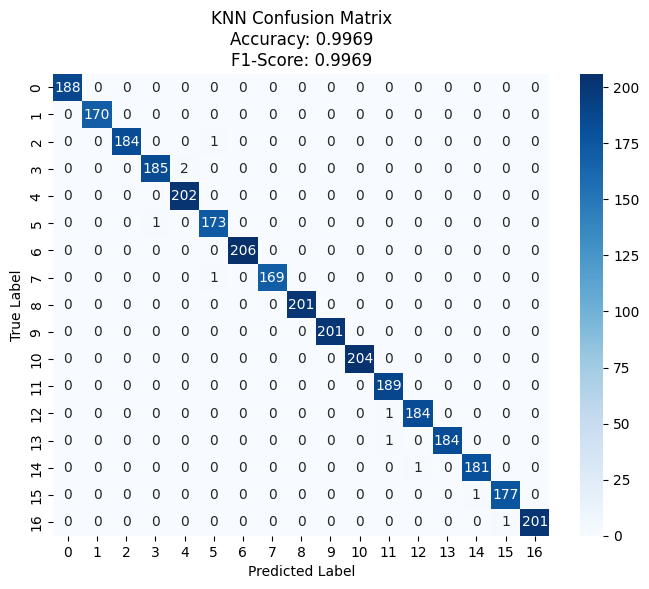

In [115]:
plot_confusion_matrix(y_test, knn_pred, title='KNN Confusion Matrix')

In [116]:
f1_score(y_test, knn_pred, average='micro')

0.9968837644125896

You can see that the accuracy of the model is very high and acceptable.

Now we plot the Confusion Matrix for the Random Forest model:

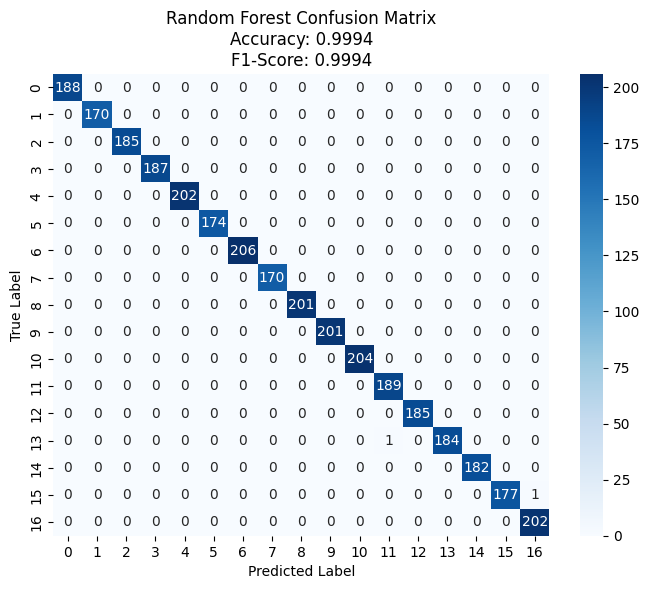

In [117]:
plot_confusion_matrix(y_test, rf_predictions, title='Random Forest Confusion Matrix')

In [118]:
f1_score(y_test, rf_predictions, average='micro')

0.9993767528825179

We can see that this model perform better than the KNN model. So it is better to apply this for further analysis.